In [1]:
import pandas as pd
import sklearn
import numpy as np
import sys
sys.path.append('../utils/')

from sklearn.cluster import DBSCAN
from sklearn import metrics

from series_plot import plot_multi_series
from computation import *
from processing import *

# Data preprocessing



In [2]:
# read data 
data = pd.read_csv('../data/continuous_data.csv')
keys = data.keys()



/Users/rj/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,

In [3]:
def search_k(search_s,keys,not_s=[],thre=0.8):
    ret = []
    for k in keys:
        count = 0
        skip_flag = False
        k_w_list = clean_key(k)
        for n_w in not_s:
            if n_w.lower() in k_w_list:
                skip_flag = True
                continue
        if not skip_flag:
            for s_w in search_s:
                if s_w.lower() in k_w_list:
                    count+=1
            prec = count/len(search_s)
            if prec>thre:
                ret.append(k)
    return ret
            
            

In [4]:
def get_series_data(keys):
    sample_keys = keys
    sample_data = data[sample_keys][1:].astype('float')
    units = data[sample_keys][:1].values[0]
    
    series_data = sample_data.values.transpose()
    keys_with_unit = []
    for i,k in enumerate(sample_keys):
        unit = str(units[i])
        comp = k+" ; "+unit
        keys_with_unit.append(comp)
    return (series_data,keys_with_unit)
def explore_uncor(uncor_pair,series_data,keys):
    idx_pool = []
    for pair in uncor_pair:
        idx_0,idx_1 = pair[0],pair[1]
        print ("uncorrelate parameters: "+keys[idx_0]+" "+ keys[idx_1])
        idx_pool.append(idx_0)
        idx_pool.append(idx_1)
    idx_pool = list(set(idx_pool))
    if len(idx_pool):
        plot_multi_series(series_data,index_list=idx_pool,title_names=sample_keys)
        

# Soil Press

['[123] No.1 Soil Press (Bulkhead)', '[124] No.2 Soil Press (Bulkhead)', '[125] No.3 Soil Press (Bulkhead)', '[126] No.4 Soil Press (Bulkhead)', '[127] No.5 Soil Press (Bulkhead)', '[128] No.6 Soil Press (Bulkhead)', '[129] No.7 Soil Press (Bulkhead)', '[130] No.8 Soil Press (Bulkhead)', '[131] No.9 Soil Press (Bulkhead)', '[132] No.10 Soil Press (Bulkhead)', '[133] No.11 Soil Press (Bulkhead)', '[134] No.12 Soil Press (Bulkhead)', '[135] No.1 Soil Press Outer Circumference', '[136] No.2 Soil Press Outer Circumference', '[137] No.3 Soil Press Outer Circumference', '[138] No.4 Soil Press Outer Circumference', '[139] No.5 Soil Press Outer Circumference', '[140] No.6 Soil Press Outer Circumference', '[244] Soil Press (Earth Collapsing)']


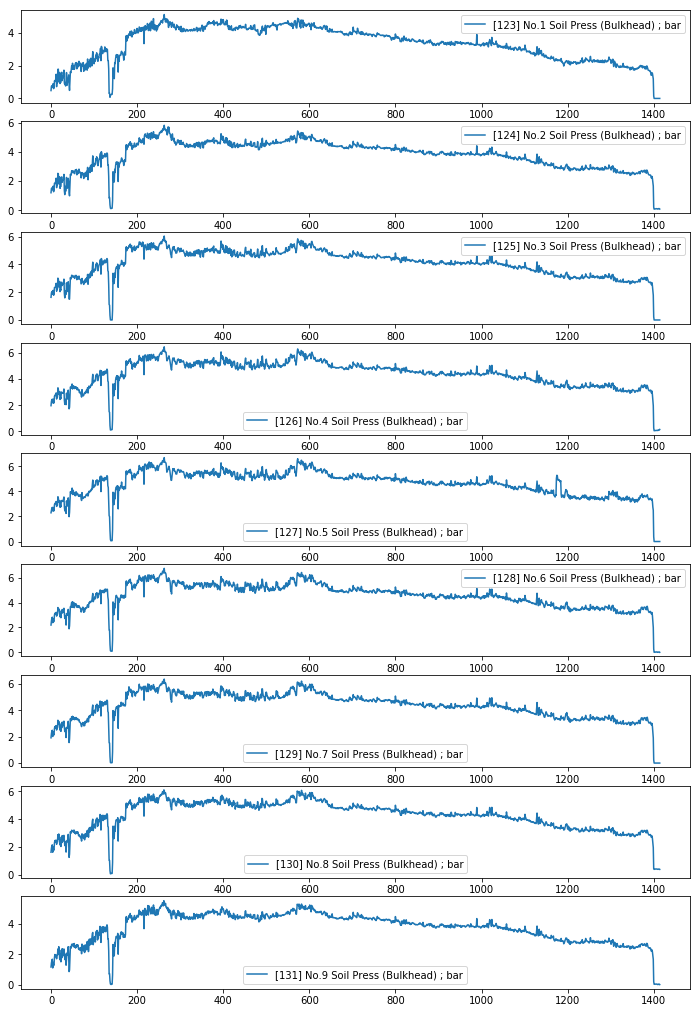

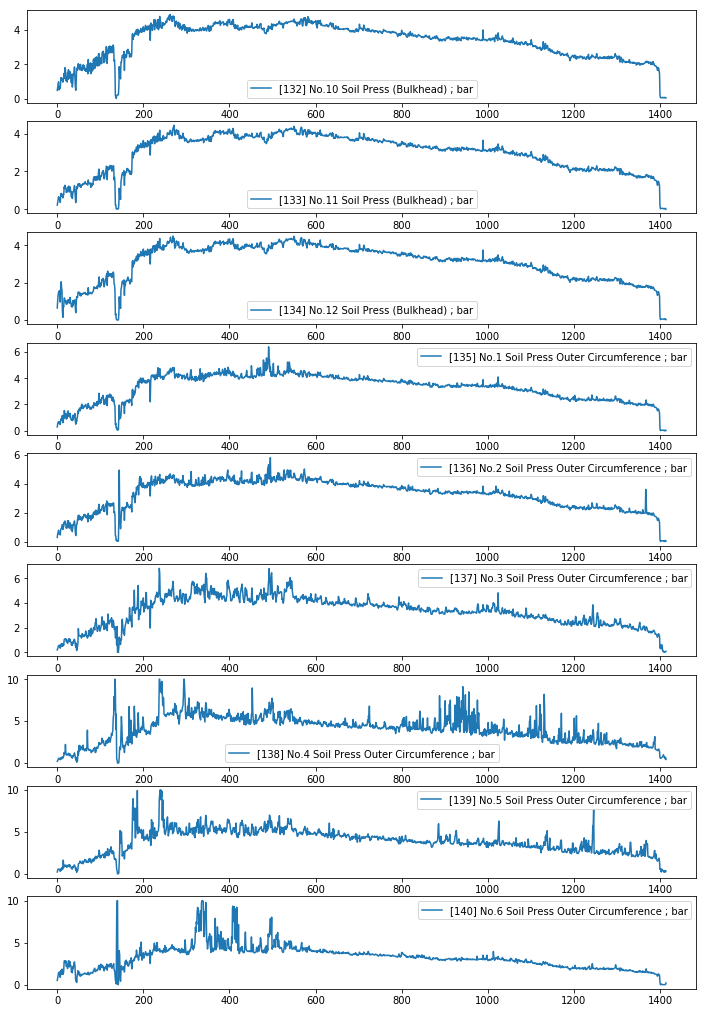

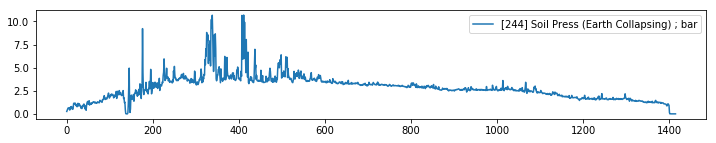

True

In [5]:
press_keys = search_k(["soil","press"],keys,not_s=['Casings','limit','max','min','Back-Filling'],thre=0.8)
print (press_keys)

series_data,sample_keys = get_series_data(press_keys)
plot_multi_series(series_data,title_names=sample_keys)

uncorrelate parameters: [127] No.5 Soil Press (Bulkhead) ; bar [133] No.11 Soil Press (Bulkhead) ; bar
uncorrelate parameters: [128] No.6 Soil Press (Bulkhead) ; bar [133] No.11 Soil Press (Bulkhead) ; bar


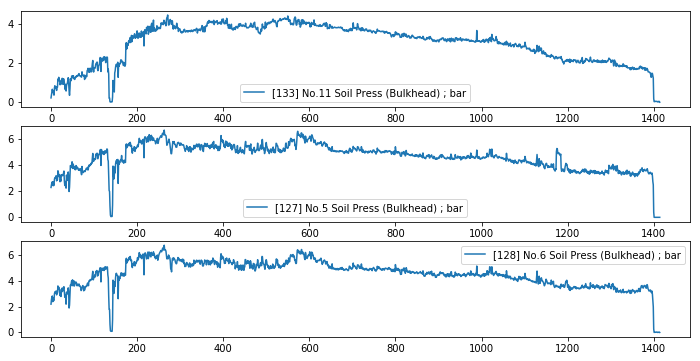

In [6]:
corr_mat = compute_corr_matrix(series_data[:12])
uncor_pair = find_uncorr_pair(corr_mat,thre=0.9)
explore_uncor(uncor_pair,series_data,sample_keys)

# Cutter Rotation Speed

In [7]:
rot_keys = search_k(["cutter","rotation"],keys,thre=0.8)
rot_keys

['[22] Cutter Rotation Speed']

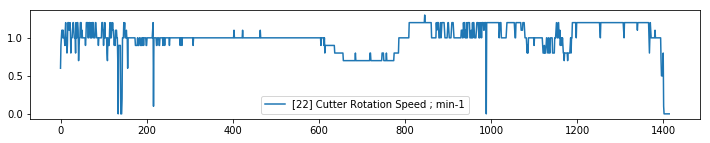

True

In [8]:
series_data,sample_keys = get_series_data(rot_keys)
plot_multi_series(series_data,title_names=sample_keys)

In [9]:
cutter_torque_keys = search_k(["cutter","torque"],keys,not_s=["not","caution","over","limit"],thre=0.8)
cutter_torque_keys[:10]

['[7] Cutter Torque',
 '[409] #1 Cutter Torque',
 '[410] #2 Cutter Torque',
 '[411] #3 Cutter Torque',
 '[412] #4 Cutter Torque',
 '[413] #5 Cutter Torque',
 '[414] #6 Cutter Torque',
 '[415] #7 Cutter Torque',
 '[416] #8 Cutter Torque',
 '[418] #10 Cutter Torque']

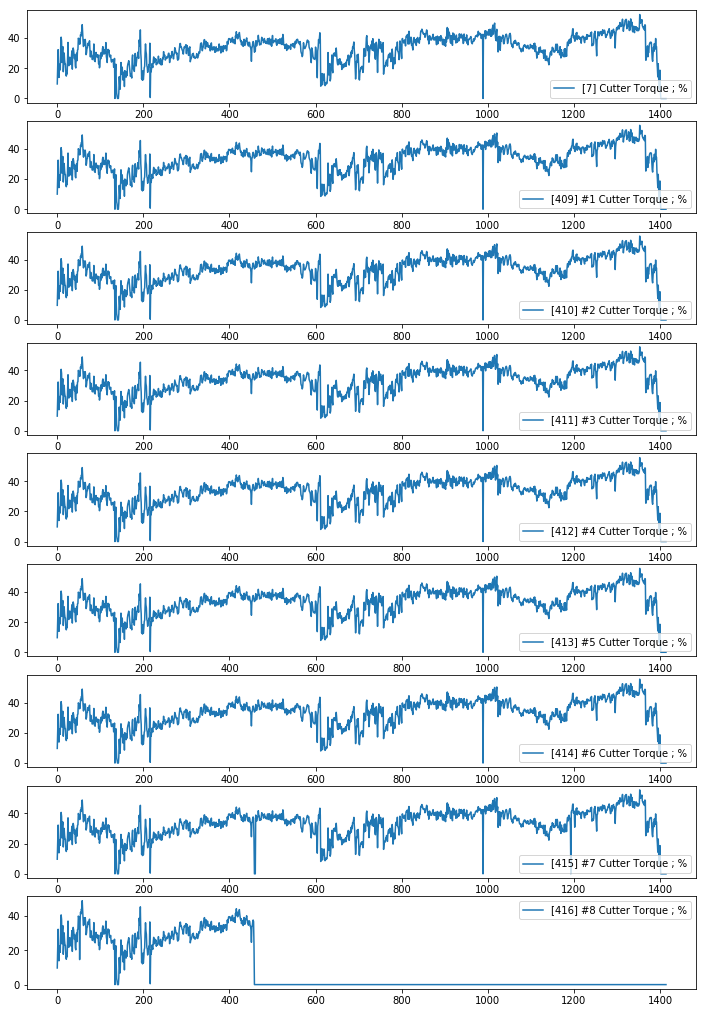

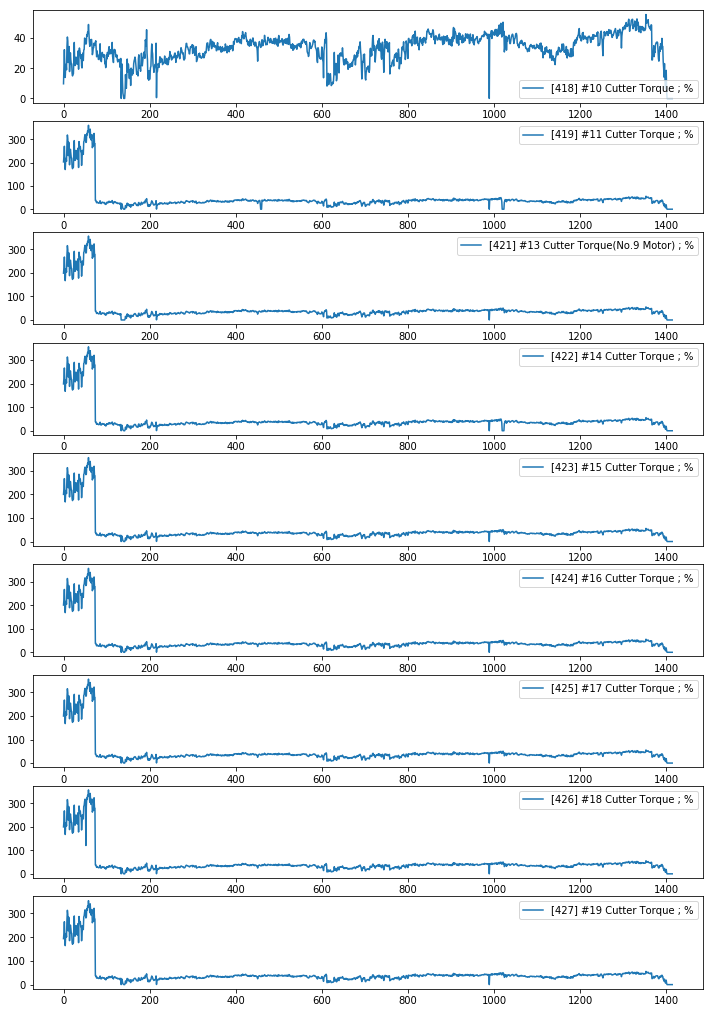

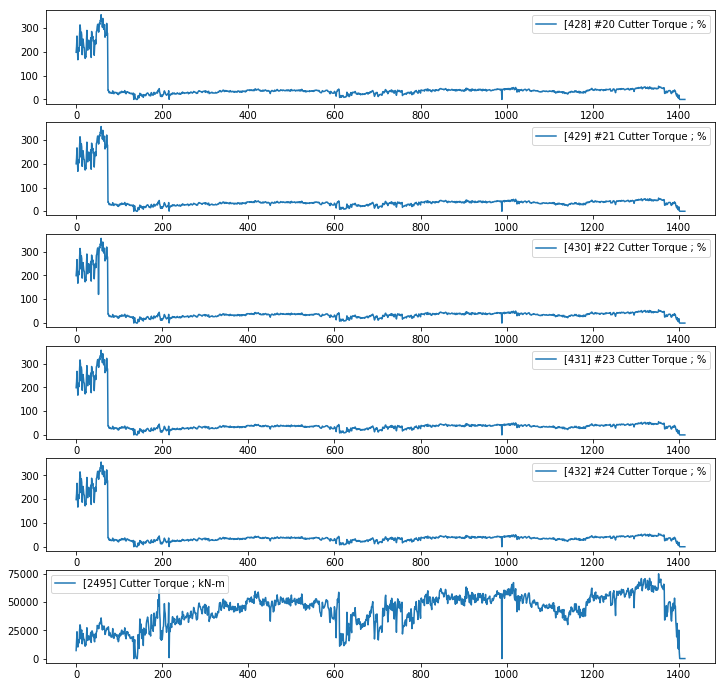

True

In [10]:
series_data,sample_keys = get_series_data(cutter_torque_keys)
plot_multi_series(series_data,title_names=sample_keys)

In [11]:
corr_mat = compute_corr_matrix(series_data[:7])
uncor_pair = find_uncorr_pair(corr_mat,thre=0.9)
print (uncor_pair)
explore_uncor(uncor_pair,series_data,sample_keys)

[]


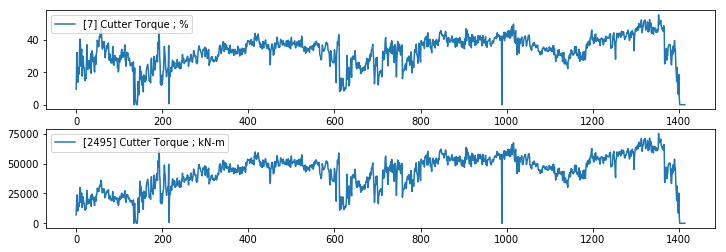

True

In [12]:
series_data,sample_keys = get_series_data([cutter_torque_keys[0],cutter_torque_keys[-1]])
plot_multi_series(series_data,title_names=sample_keys)

# Thrust Force

['[9] Total Thrust Force', '[10] Articulation Total Thrust Force', '[11] [DEL]CHD Support Total Thrust Force', '[6009] CUTTER HEAD THRUST FORCE ABNORMAL', '[6010] CUTTER HEAD THRUST FORCE DIFF.CAUTION', '[6011] CUTTER HEAD THRUST FORCE DIFF.ABNORMAL']


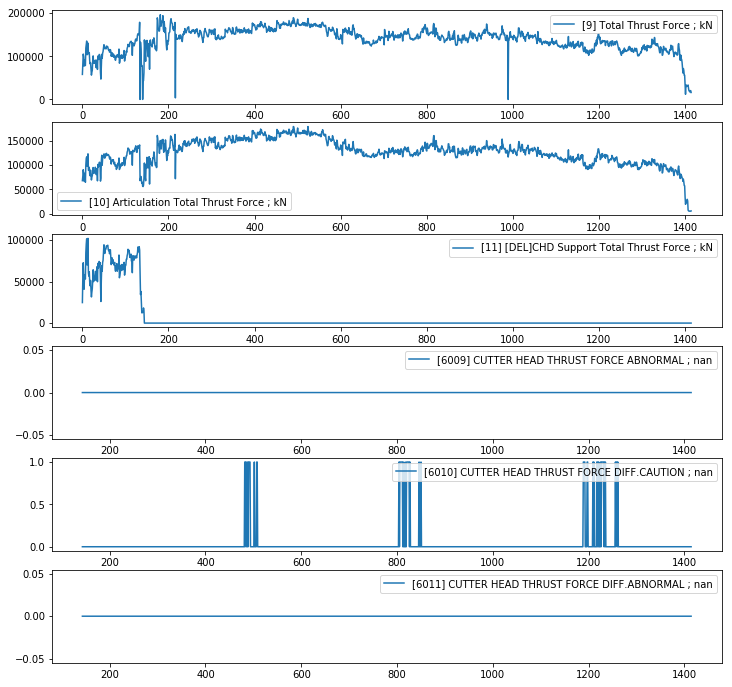

True

In [13]:
thrust_force_keys = search_k(["thrust","force"],keys,not_s=["not","caution","over","limit"],thre=0.8)
print(thrust_force_keys)
series_data,sample_keys = get_series_data(thrust_force_keys)
plot_multi_series(series_data,title_names=sample_keys)

# thrust_speed_keys

['[2527] [c]Thrust Speed Average']


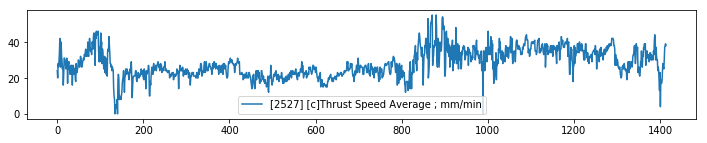

True

In [14]:
thrust_speed_keys = search_k(["thrust","speed"],keys,not_s=["not","caution","over","limit"],thre=0.8)
print(thrust_speed_keys)
series_data,sample_keys = get_series_data(thrust_speed_keys)
plot_multi_series(series_data,title_names=sample_keys)

# pitching and Bearing

['[2617] [c]Bearing(Front)']


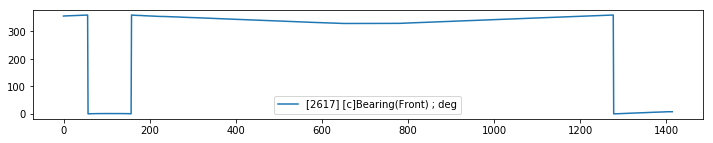

True

In [15]:
bearing_keys = search_k(["bearing","front"],keys,not_s=["not","caution","over","limit"],thre=0.5)
print(bearing_keys)
series_data,sample_keys = get_series_data(bearing_keys)
plot_multi_series(series_data,title_names=sample_keys)

['[183] Pitching (Front)', '[2615] [c]Pitching (Front)', '[2679] [c]Calc Pitching (Front)']


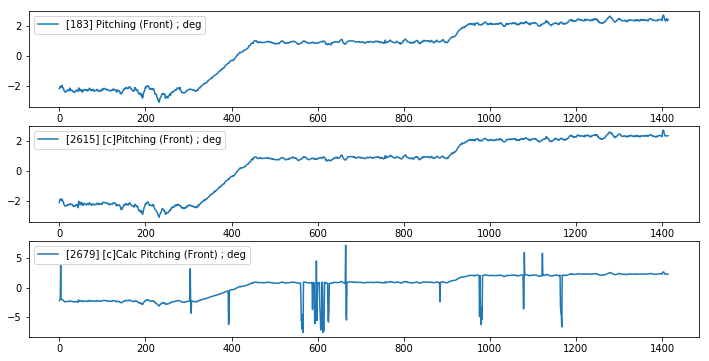

True

In [16]:
pitching_keys = search_k(["pitching","front"],keys,not_s=["not","caution","over","limit"],thre=0.5)
print(pitching_keys)
series_data,sample_keys = get_series_data(pitching_keys)
plot_multi_series(series_data,title_names=sample_keys)

# Feedline flow

In [17]:
foam_k = search_k(["foam","volume","ring"],keys,not_s=["not","caution","over","limit"],thre=0.9)
print(foam_k)

['[2766] [c]Foam 1 Volume(Ring)', '[2767] [c]Foam 2 Volume(Ring)', '[2768] [c]Foam 3 Volume(Ring)', '[2769] [c]Foam 4 Volume(Ring)', '[2770] [c]Foam 5 Volume(Ring)', '[2771] [c]Foam 6 Volume(Ring)', '[2772] [c]Foam 7 Volume(Ring)', '[2773] [c]Foam 8 Volume(Ring)', '[2774] [c]Foam 9 Volume(Ring)', '[2775] [c]Foam 10 Volume(Ring)', '[2776] [c]Foam 11 Volume(Ring)', '[2777] [c]Foam 12 Volume(Ring)', '[2778] [c]Foam 13 Volume(Ring)', '[2779] [c]Foam 14 Volume(Ring)', '[2780] [c]Foam 15 Volume(Ring)', '[2781] [c]Foam 16 Volume(Ring)', '[2782] [c]Foam 17 Volume(Ring)', '[2783] [c]Foam 18 Volume(Ring)', '[2784] [c]Foam 19 Volume(Ring)', '[2785] [c]Foam 20 Volume(Ring)', '[2829] [c]Foam Volume(Ring)', '[6104] [c]Foam 21 Volume(Ring)', '[6105] [c]Foam 22 Volume(Ring)', '[6106] [c]Foam 23 Volume(Ring)', '[6107] [c]Foam 24 Volume(Ring)', '[6108] [c]Foam 25 Volume(Ring)', '[6109] [c]Foam 26 Volume(Ring)', '[6110] [c]Foam 27 Volume(Ring)', '[6111] [c]Foam 28 Volume(Ring)', '[6112] [c]Foam 29 Volume

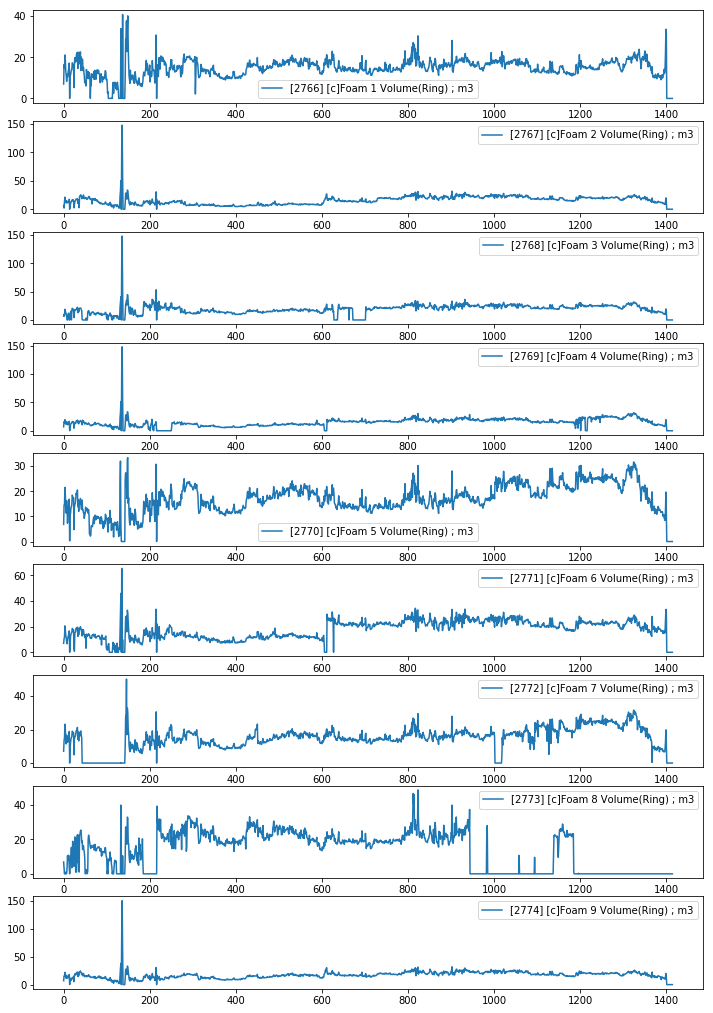

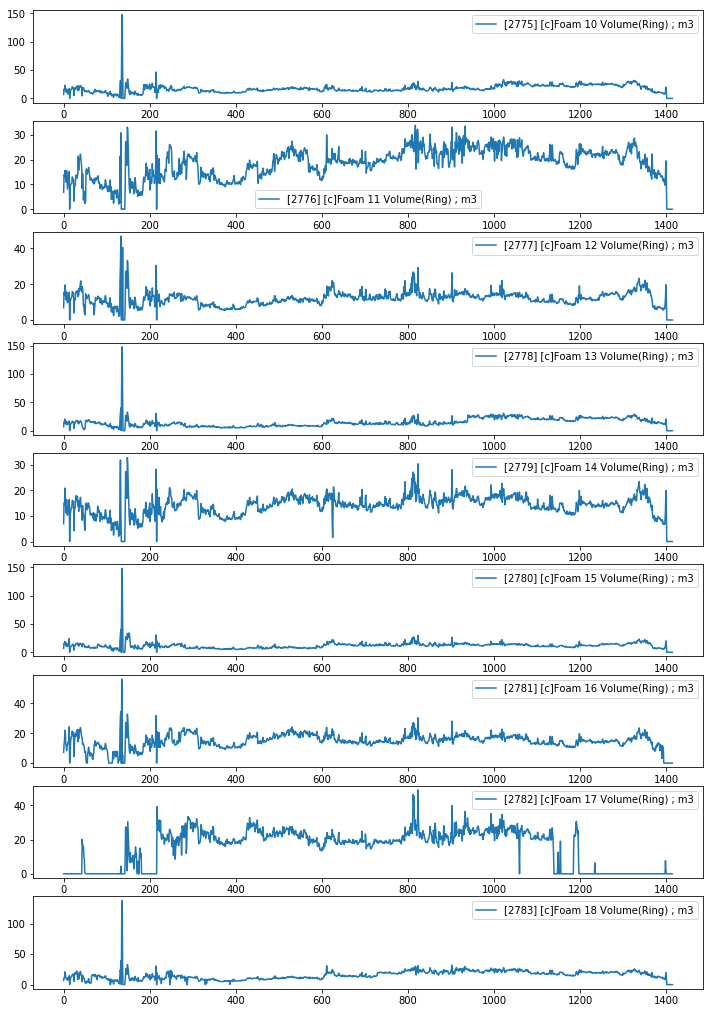

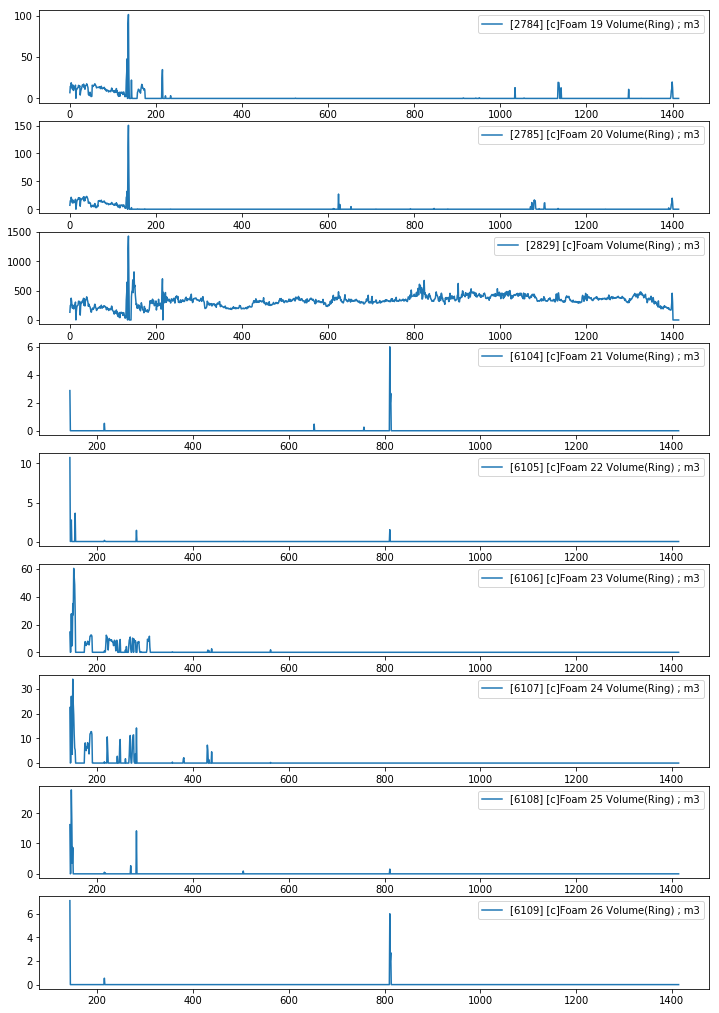

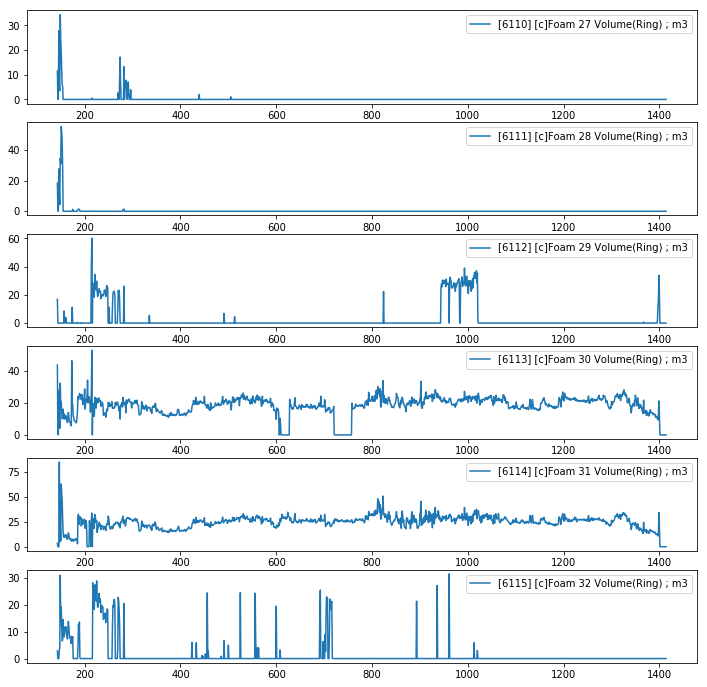

True

In [18]:
series_data,sample_keys = get_series_data(foam_k)
plot_multi_series(series_data,title_names=sample_keys)

In [19]:
polymer_k = search_k(["polymer","volume","total"],keys,not_s=["not","caution","over","limit"],thre=0.9)
print(polymer_k)

['[5903] [c]Total Polymer Volume (Ring)']


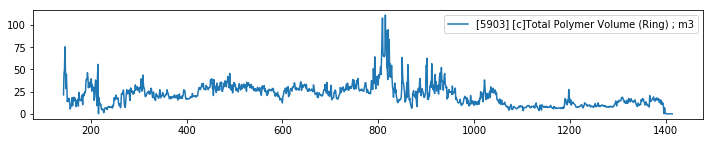

True

In [20]:
series_data,sample_keys = get_series_data(polymer_k)
plot_multi_series(series_data,title_names=sample_keys)

In [21]:
gap_k = search_k(["gap","volume","total","ring"],keys,not_s=["not","caution","over","limit"],thre=0.9)
print(gap_k)

['[5933] [c]GAP Port Volume Total (Ring)']


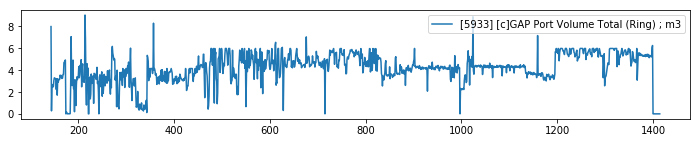

True

In [22]:
series_data,sample_keys = get_series_data(gap_k)
plot_multi_series(series_data,title_names=sample_keys)

In [23]:
slurry_k = search_k(["slurry","volume","total","ring"],keys,not_s=["not","caution","over","limit"],thre=0.9)
print(slurry_k)

['[5961] [c]Slurry Port Volume Total (Ring)']


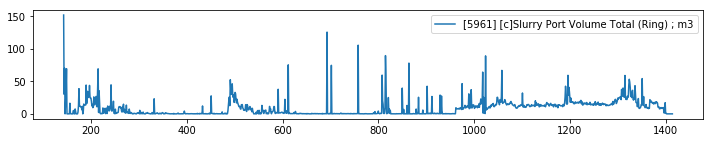

True

In [24]:
series_data,sample_keys = get_series_data(slurry_k)
plot_multi_series(series_data,title_names=sample_keys)

In [25]:
earth_k = search_k(["keep","vol"],keys,not_s=["not","caution","over","limit","gap"],thre=0.9)
print(earth_k)

['[2968] [c]No.1 KEEP Vol', '[2969] [c]No.2 KEEP Vol', '[2970] [c]Total Keep Vol']


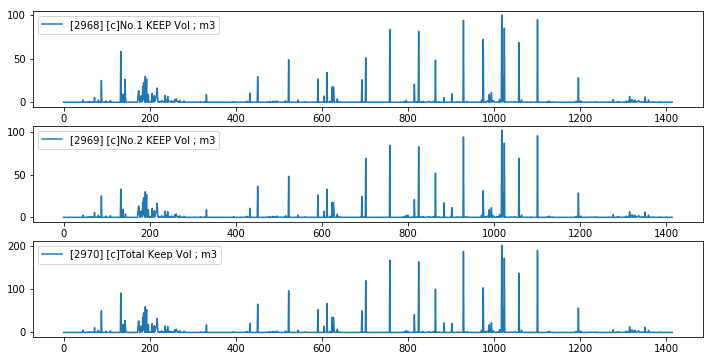

True

In [26]:
series_data,sample_keys = get_series_data(earth_k)
plot_multi_series(series_data,title_names=sample_keys)

In [27]:
water_k = search_k(["high","water","volume"],keys,not_s=["not","caution","over","limit","gap"],thre=0.9)
print(water_k)

['[2974] [c]No.1 High Press Water Volume', '[2975] [c]No.2 High Press Water Volume', '[2976] [c]No.3 High Press Water Volume']


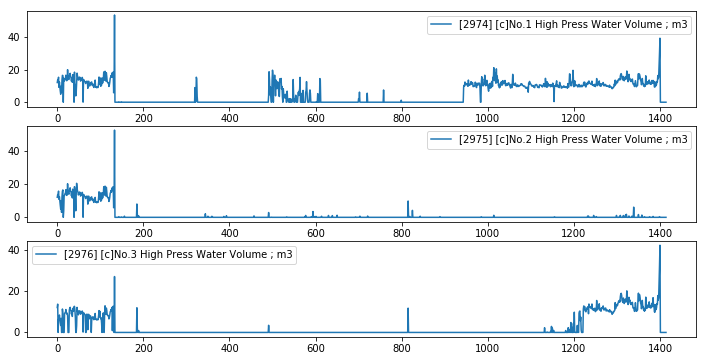

True

In [28]:
series_data,sample_keys = get_series_data(water_k)
plot_multi_series(series_data,title_names=sample_keys)

In [29]:
refill_k = search_k(["refill","flow"],keys,
                    not_s=["not","caution","over","limit","gap","counter","setting"],thre=0.9)
print(refill_k)

['[832] No.1 Refill Flow', '[833] No.2 Refill Flow', '[834] Total Refill Flow', '[2971] [c]No.1 Refill Flow Vol', '[2972] [c]No.2 Refill Flow Vol', '[2973] [c]Total Refill Flow Vol']


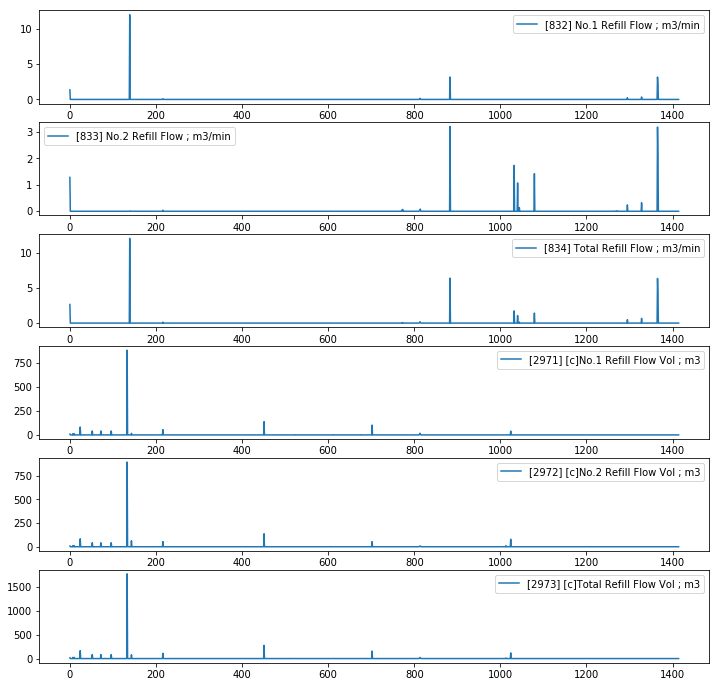

True

In [30]:
series_data,sample_keys = get_series_data(refill_k)
plot_multi_series(series_data,title_names=sample_keys)

In [31]:
feed_line_param = ['[2829] [c]Foam Volume(Ring)',polymer_k[0],
                  gap_k[0],slurry_k[0],earth_k[-1],refill_k[-1],water_k[0]]

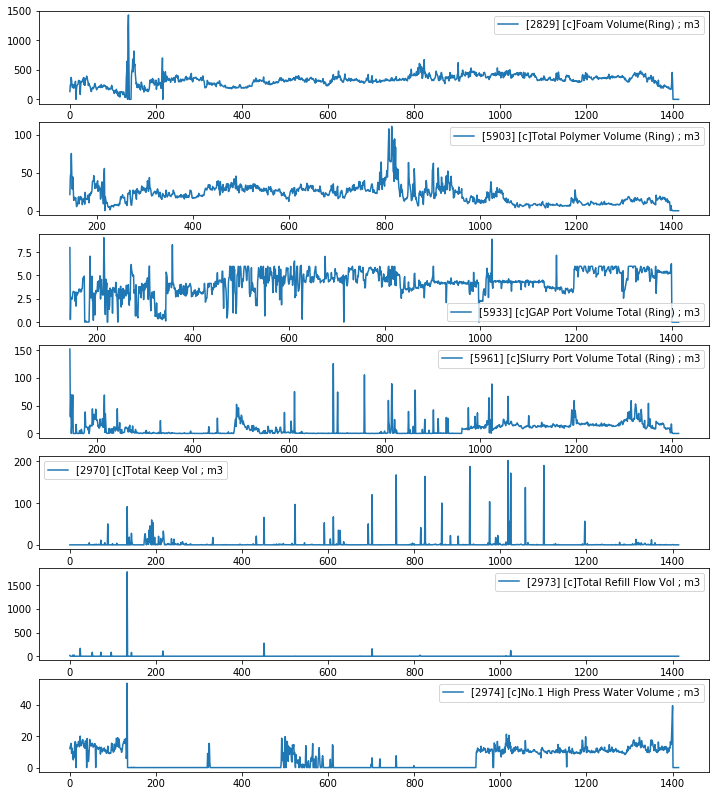

True

In [32]:
series_data,sample_keys = get_series_data(feed_line_param)
plot_multi_series(series_data,title_names=sample_keys)

# Combine all 


In [33]:
pressure_final = press_keys[0]

In [34]:
param_final = [pressure_final,rot_keys[0],cutter_torque_keys[-1],thrust_force_keys[0],thrust_speed_keys[0]]

In [35]:
param_final

['[123] No.1 Soil Press (Bulkhead)',
 '[22] Cutter Rotation Speed',
 '[2495] Cutter Torque',
 '[9] Total Thrust Force',
 '[2527] [c]Thrust Speed Average']

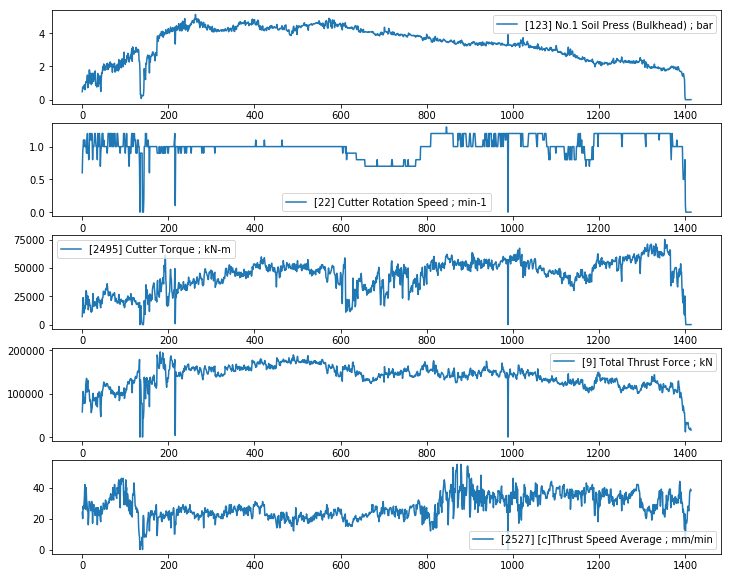

True

In [36]:
series_data,sample_keys = get_series_data(param_final)
plot_multi_series(series_data,title_names=sample_keys)

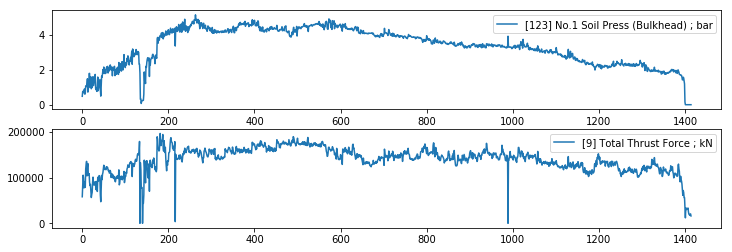

True

In [38]:
param_test = [pressure_final,thrust_force_keys[0]]
series_data,sample_keys = get_series_data(param_test)
plot_multi_series(series_data,title_names=sample_keys)

In [39]:
corr_mat = compute_corr_matrix(series_data)

In [40]:
corr_mat

array([[1.        , 0.83333753],
       [0.83333753, 1.        ]])

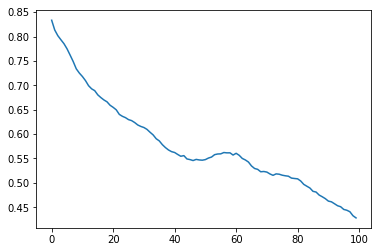

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

ccf1 = sm.tsa.stattools.ccf(series_data[1],series_data[0],unbiased=False)
plt.plot(ccf1[:100])